<a href="https://colab.research.google.com/github/hipeoplea/Sai/blob/main/Sai_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

df = pd.read_csv("WineDataset.csv")
df = df.fillna(df.median(numeric_only=True))
df.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
print("Пропущенные значения по столбцам:")
df.isna().sum()

Пропущенные значения по столбцам:


,0
Alcohol,0
Malic Acid,0
Ash,0
Alcalinity of ash,0
Magnesium,0
Total phenols,0
Flavanoids,0
Nonflavanoid phenols,0
Proanthocyanins,0
Color intensity,0


все признаки числовые и ни одного пустого значения нет но заполнить их стоит медианым значением
а для категориальных признаков мы используем get_dummies

In [ ]:
df = df.fillna(df.median(numeric_only=True))
df = pd.get_dummies(df, drop_first=True)

#Масштабируем признаки
делаем Z-стандартизацию среднее становится равно около нуля, отклонение равно 1

In [ ]:
y = df["Wine"]
X = df.drop(columns=["Wine"])
mean = X.mean()
std = X.std().replace(0, 1)
X_scaled = (X - mean) / std
X_scaled.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000
mean,-8.781989e-16,0.000000,-7.996101e-16,-7.983626e-17,1.995907e-17,0.000000,-3.193450e-16,3.592632e-16,-1.397135e-16,1.995907e-17,1.995907e-16,3.193450e-16,0.000000
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-2.427388e+00,-1.428952,-3.668813e+00,-2.663505e+00,-2.082381e+00,-2.101318,-1.691200e+00,-1.862979e+00,-2.063214e+00,-1.629691e+00,-2.088840e+00,-1.889723e+00,-1.488987
25%,-7.860275e-01,-0.656896,-5.705131e-01,-6.871987e-01,-8.220960e-01,-0.882977,-8.252115e-01,-7.380592e-01,-5.956034e-01,-7.928659e-01,-7.654033e-01,-9.495697e-01,-0.782431
50%,6.082829e-02,-0.421922,-2.375431e-02,1.514024e-03,-1.219377e-01,0.095690,1.058511e-01,-1.755994e-01,-6.272092e-02,-1.587767e-01,3.303369e-02,2.370660e-01,-0.233063
75%,8.337767e-01,0.667909,6.961448e-01,6.003946e-01,5.082048e-01,0.806722,8.466967e-01,6.078267e-01,6.274055e-01,4.925666e-01,7.111583e-01,7.863692e-01,0.756117
max,2.253415e+00,3.100446,3.147447e+00,3.145637e+00,4.359076e+00,2.532372,3.054216e+00,2.395645e+00,3.475269e+00,3.425768e+00,3.292407e+00,1.955399e+00,2.963114


In [ ]:
X_scaled.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


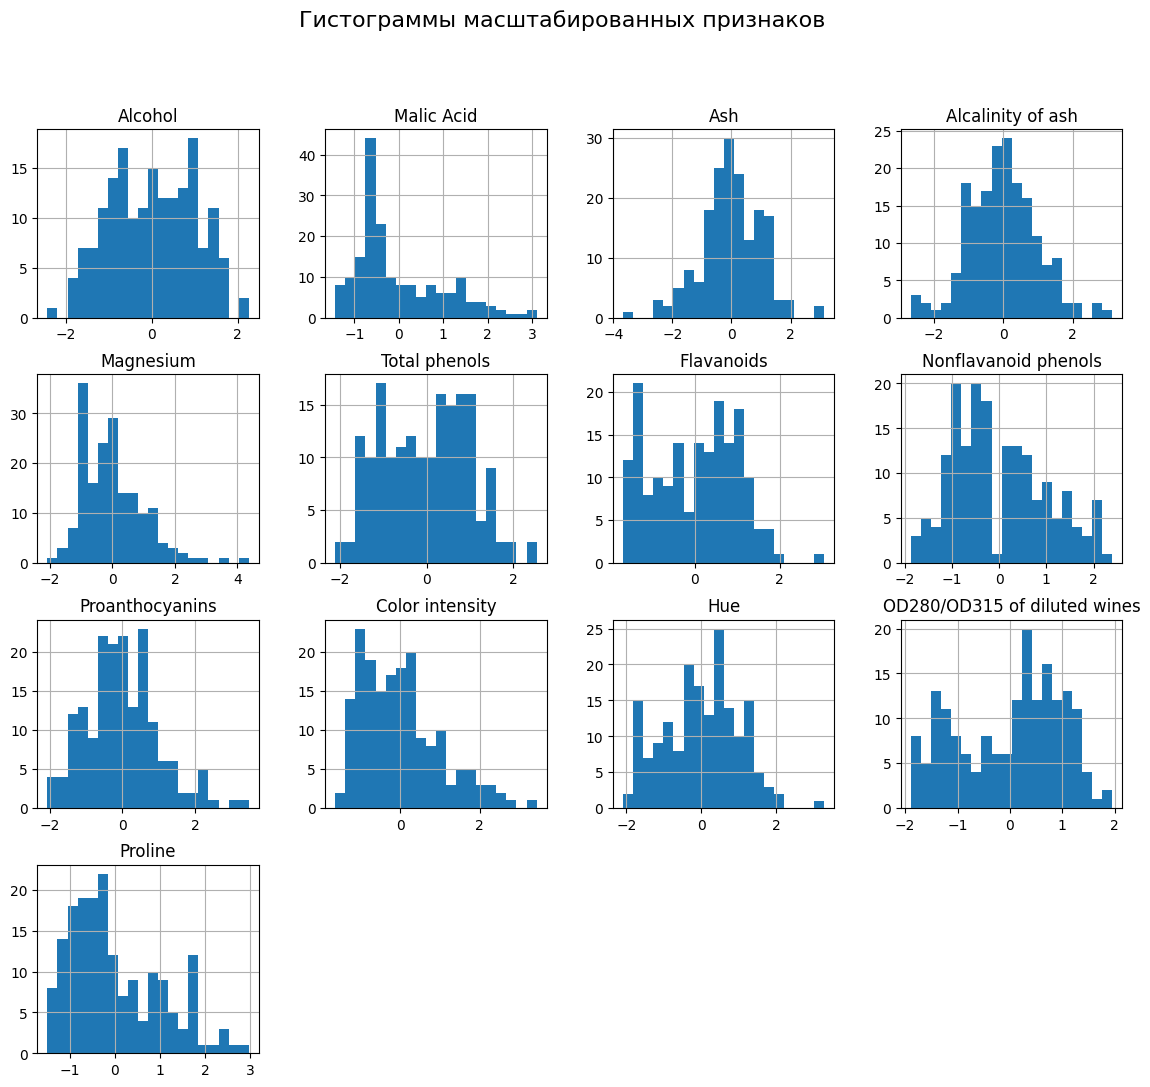

In [ ]:
X_scaled.hist(figsize=(14, 12), bins=20)
plt.suptitle("Гистограммы масштабированных признаков", fontsize=16)
plt.show()

<Figure size 1400x800 with 0 Axes>

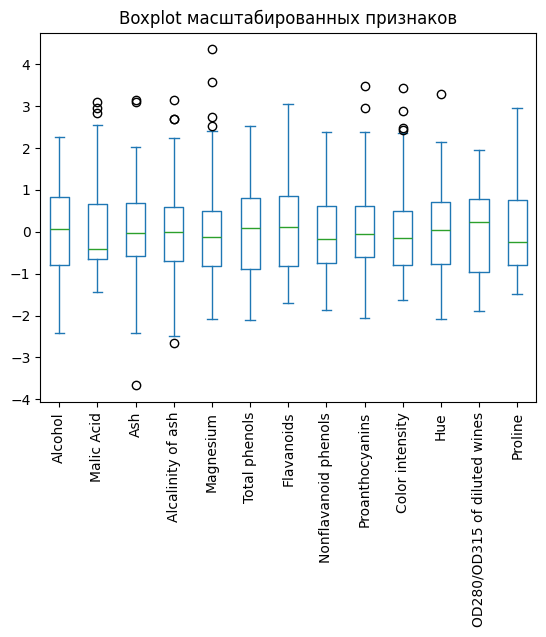

In [ ]:
plt.figure(figsize=(14, 8))
X_scaled.plot(kind="box")
plt.title("Boxplot масштабированных признаков")
plt.xticks(rotation=90)
plt.show()

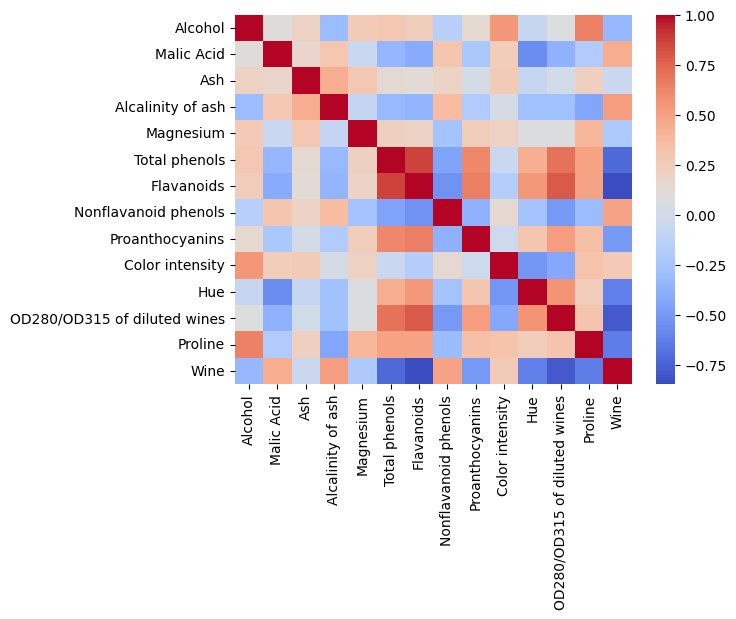

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.show()


In [ ]:
corr = df.corr(numeric_only=True)["Wine"].abs().sort_values(ascending=False)
corr

,Wine
Wine,1.000000
Flavanoids,0.847498
OD280/OD315 of diluted wines,0.788230
Total phenols,0.719163
Proline,0.633717
Hue,0.617369
Alcalinity of ash,0.517859
Proanthocyanins,0.499130
Nonflavanoid phenols,0.489109
Malic Acid,0.437776


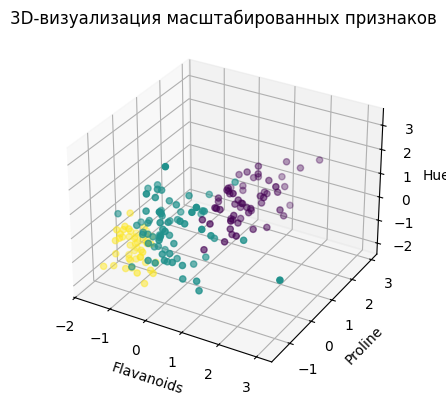

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(121, projection='3d')

x = X_scaled["Flavanoids"]
y_ = X_scaled["Proline"]
z = X_scaled["Hue"]

scatter = ax.scatter(x, y_, z, c=y, cmap='viridis')

ax.set_xlabel("Flavanoids")
ax.set_ylabel("Proline")
ax.set_zlabel("Hue")
plt.title("3D-визуализация масштабированных признаков")
plt.show()


Разделяем на обучающую и тестовую выборки (ctrl+c, ctrl+v c 3 лабы)

In [ ]:
np.random.seed(42)
msk = np.random.rand(len(df)) < 0.8
X_train = X_scaled.loc[msk].values
y_train = y.loc[msk].values

X_test = X_scaled.loc[~msk].values
y_test = y.loc[~msk].values

Класс `KNNClassifier` реализует алгоритм *k-ближайших соседей* для классификации.

Алгоритм **запоминает** обучающие данные и сравнивает новые объекты со всеми известными.


Для сравнения объектов используется расстояние:

$$
 d(x, v) = \sqrt(\sum_{i=1}^{n} (x_i - v_i)^2)
$$

где  
- \(x\) — новый объект,  
- \(v\) — объект из обучающей выборки,  
- \(n\) — число признаков.


#Правило классификации

Алгоритм выбирает класс по большинству среди ближайших соседей.

1. Рассчитываются расстояния до всех обучающих объектов.
2. Выбираются индексы \(k\) ближайших соседей:

$$
\text{neighbors} = \text{argsort}(d)[:k]
$$

3. Среди их классов выбирается самый частый:

$$
\hat{y} = \mathrm{mode}(y_{\text{neighbors}})
$$

Методы класса

**`__init__(k)`**

Сохраняет число соседей \(k\).

**`fit(X, y)`**
Запоминает обучающие данные:

$$
X_{\text{train}} = X, \quad y_{\text{train}} = y
$$

**`_euclidean_distances(x)`**

Возвращает расстояния нового объекта до всех обучающих:

$$
d_i = \sqrt(\sum_{j=1}^{d} (X_{ij} - x_j)^2)
$$

In [ ]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        self.X_train = X
        self.y_train = y

    def _euclidean_distances(self, x: np.ndarray) -> np.ndarray:
        diff = self.X_train - x
        dists = np.linalg.norm(diff, axis=1)
        return dists

    def _predict_one(self, x: np.ndarray):
        dists = self._euclidean_distances(x)
        neighbor_idx = np.argsort(dists)[:self.k]
        neighbor_labels = self.y_train[neighbor_idx]

        labels, counts = np.unique(neighbor_labels, return_counts=True)
        majority_label = labels[np.argmax(counts)]
        return majority_label

    def predict(self, X: np.ndarray) -> np.ndarray:
        predictions = [self._predict_one(x) for x in X]
        return np.array(predictions)

Метрики `accuracy_score` и `confusion_matrix`

`accuracy_score`

Функция вычисляет **долю правильных предсказаний** модели:

$$
\text{accuracy} = \frac{1}{n} \sum_{i=1}^{n} [\,y_i = \hat{y}_i\,]
$$

где  
- $( y_i )$ — истинный класс,
- $( \hat{y}_i )$ — предсказанный класс,
- выражение $[\, y_i = \hat{y}_i \,]$ равно 1, если предсказано верно, и 0 — иначе.


`confusion_matrix`

Матрица ошибок — это таблица размера $(K \times K)$, где \(K\) — число классов.

Каждый элемент матрицы:

$$
CM_{i,j} = \text{количество объектов класса } i \text{, предсказанных как } j
$$

- строки — истинные классы,
- столбцы — предсказанные классы.

`classification_report_custom`

отчёт по классам (precision, recall, F1)

$$
precision_i = \frac{TP_i}{TP_i + FP_i}
$$

Сколько предсказаний класса верны.


Recall

$$
recall_i = \frac{TP_i}{TP_i + FN_i}
$$

Сколько объектов класса мы нашли.

F1-score

$$
F1_i = \frac{2 \cdot precision_i \cdot recall_i}{precision_i + recall_i}
$$

Гармоническое среднее precision и recall.


In [ ]:
def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray):
    labels = np.unique(np.concatenate([y_true, y_pred]))
    label_to_idx = {label: idx for idx, label in enumerate(labels)}
    n_labels = len(labels)
    cm = np.zeros((n_labels, n_labels), dtype=int)

    for true, pred in zip(y_true, y_pred):
        i = label_to_idx[true]
        j = label_to_idx[pred]
        cm[i, j] += 1

    return cm, labels

def classification_report_custom(y_true: np.ndarray, y_pred: np.ndarray):
    cm, labels = confusion_matrix(y_true, y_pred)
    n_classes = len(labels)

    support = cm.sum(axis=1)

    precisions = []
    recalls = []
    f1s = []

    for i in range(n_classes):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)

    precisions = np.array(precisions)
    recalls = np.array(recalls)
    f1s = np.array(f1s)

    total_support = support.sum()
    weights = support / total_support

    print(f"{'class':>10} {'precision':>10} {'recall':>10} {'f1-score':>10} {'support':>10}")
    for lbl, p, r, f, s in zip(labels, precisions, recalls, f1s, support):
        print(f"{str(lbl):>10} {p:10.3f} {r:10.3f} {f:10.3f} {int(s):10d}")

In [ ]:
def run_knn_experiment(feature_cols, k_values, model_name="Модель"):
    print(f"\n{model_name}")
    print("Используем признаки:", ", ".join(feature_cols))

    feature_indices = [X_scaled.columns.get_loc(col) for col in feature_cols]

    Xtr = X_train[:, feature_indices]
    Xte = X_test[:, feature_indices]

    ytr = y_train
    yte = y_test

    for k in k_values:
        print(f"\nk = {k}")
        model = KNNClassifier(k=k)
        model.fit(Xtr, ytr)
        y_pred = model.predict(Xte)

        acc = accuracy_score(yte, y_pred)
        print("Точность:", acc)

        cm, labels = confusion_matrix(yte, y_pred)
        print("Матрица ошибок:\n", cm)

        print("\nClassification report:")
        classification_report_custom(yte, y_pred)

In [ ]:
np.random.seed(42)
all_features = list(X.columns)
random_feature_cols = list(np.random.choice(all_features, size=5, replace=False))

k_values = [3, 5, 10]

run_knn_experiment(random_feature_cols, k_values, model_name="Модель 1 (случайные признаки)")


Модель 1 (случайные признаки)
Используем признаки: OD280/OD315 of diluted wines, Color intensity, Alcohol, Proanthocyanins, Total phenols

k = 3
Точность: 0.9117647058823529
Матрица ошибок:
 [[12  0  0]
 [ 1 13  2]
 [ 0  0  6]]

Classification report:
     class  precision     recall   f1-score    support
         1      0.923      1.000      0.960         12
         2      1.000      0.812      0.897         16
         3      0.750      1.000      0.857          6

k = 5
Точность: 0.9411764705882353
Матрица ошибок:
 [[12  0  0]
 [ 1 14  1]
 [ 0  0  6]]

Classification report:
     class  precision     recall   f1-score    support
         1      0.923      1.000      0.960         12
         2      1.000      0.875      0.933         16
         3      0.857      1.000      0.923          6

k = 10
Точность: 0.9117647058823529
Матрица ошибок:
 [[12  0  0]
 [ 0 14  2]
 [ 0  1  5]]

Classification report:
     class  precision     recall   f1-score    support
         1      1.000  

In [ ]:
fixed_feature_cols = ["Flavanoids",
                      "Proline",
                      "Hue"]

run_knn_experiment(fixed_feature_cols, k_values, model_name="Модель 2 (фиксированные признаки)")



Модель 2 (фиксированные признаки)
Используем признаки: Flavanoids, Proline, Hue

k = 3
Точность: 0.9117647058823529
Матрица ошибок:
 [[11  1  0]
 [ 1 14  1]
 [ 0  0  6]]

Classification report:
     class  precision     recall   f1-score    support
         1      0.917      0.917      0.917         12
         2      0.933      0.875      0.903         16
         3      0.857      1.000      0.923          6

k = 5
Точность: 0.9117647058823529
Матрица ошибок:
 [[11  1  0]
 [ 1 14  1]
 [ 0  0  6]]

Classification report:
     class  precision     recall   f1-score    support
         1      0.917      0.917      0.917         12
         2      0.933      0.875      0.903         16
         3      0.857      1.000      0.923          6

k = 10
Точность: 0.8823529411764706
Матрица ошибок:
 [[11  1  0]
 [ 2 13  1]
 [ 0  0  6]]

Classification report:
     class  precision     recall   f1-score    support
         1      0.846      0.917      0.880         12
         2      0.929     